# Kaggle Playground - January

In [40]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score, cross_validate
from statsmodels.api import OLS, add_constant
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, r2_score

## EXPLORATORY ANALYSIS

In [25]:
train = pd.read_csv('data/train.csv')
train.head()

id     cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0   1  0.670390  0.811300  0.643968  0.291791  0.284117  0.855953  0.890700   
1   3  0.388053  0.621104  0.686102  0.501149  0.643790  0.449805  0.510824   
2   4  0.834950  0.227436  0.301584  0.293408  0.606839  0.829175  0.506143   
3   5  0.820708  0.160155  0.546887  0.726104  0.282444  0.785108  0.752758   
4   8  0.935278  0.421235  0.303801  0.880214  0.665610  0.830131  0.487113   

      cont8     cont9    cont10    cont11    cont12    cont13    cont14  \
0  0.285542  0.558245  0.779418  0.921832  0.866772  0.878733  0.305411   
1  0.580748  0.418335  0.432632  0.439872  0.434971  0.369957  0.369484   
2  0.558771  0.587603  0.823312  0.567007  0.677708  0.882938  0.303047   
3  0.823267  0.574466  0.580843  0.769594  0.818143  0.914281  0.279528   
4  0.604157  0.874658  0.863427  0.983575  0.900464  0.935918  0.435772   

     target  
0  7.243043  
1  8.203331  
2  7.776091  
3  6.957716  
4  7.951046

In [26]:
test = pd.read_csv('data/test.csv')
test.head()

id     cont1     cont2     cont3     cont4     cont5     cont6     cont7  \
0   0  0.353600  0.738780  0.600939  0.293377  0.285691  0.458006  0.620704   
1   2  0.907222  0.189756  0.215531  0.869915  0.301333  0.528958  0.390351   
2   6  0.179287  0.355353  0.623972  0.437812  0.282476  0.320826  0.386789   
3   7  0.359385  0.181049  0.551368  0.206386  0.280763  0.482076  0.506677   
4  10  0.335791  0.682607  0.676481  0.219465  0.282861  0.581721  0.748639   

      cont8     cont9    cont10    cont11    cont12    cont13    cont14  
0  0.422249  0.369203  0.435727  0.550540  0.699134  0.286864  0.364515  
1  0.521112  0.794779  0.798580  0.446475  0.449037  0.916964  0.513002  
2  0.776422  0.222268  0.229102  0.211913  0.222651  0.327164  0.827941  
3  0.362793  0.379737  0.345686  0.445276  0.518485  0.299028  0.598166  
4  0.350158  0.448915  0.506878  0.817721  0.805895  0.790591  0.249275

In [4]:
print(len(train), len(test))

300000 200000


In [5]:
train.isnull().sum()
test.isnull().sum()

id        0
cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
dtype: int64

In [6]:
train.describe()

id          cont1          cont2          cont3  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean   249825.145857       0.506873       0.497898       0.521557   
std    144476.732562       0.203976       0.228159       0.200770   
min         1.000000      -0.082263      -0.031397       0.020967   
25%    124656.500000       0.343078       0.319170       0.344096   
50%    249738.500000       0.484005       0.553209       0.551471   
75%    374836.250000       0.643789       0.731263       0.648315   
max    499999.000000       1.016227       0.859697       1.006955   

               cont4          cont5          cont6          cont7  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.515683       0.502022       0.526515       0.487890   
std         0.233035       0.220701       0.217909       0.181096   
min         0.152761       0.276377       0.066166      -0.097666   
25%         0.294935       0.284108       0.356163       0.346600   
50%         0.482880       0.451733       0.470988       0.466825   
75%         0.748705       0.670660       0.694043       0.581292   
max         1.010402       1.034261       1.043858       1.066167   

               cont8          cont9         cont10         cont11  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.525163       0.459857       0.520532       0.483926   
std         0.216221       0.196685       0.201854       0.220082   
min         0.217260      -0.240604      -0.085046       0.083277   
25%         0.341486       0.330832       0.375465       0.300474   
50%         0.483460       0.416843       0.458877       0.441916   
75%         0.685250       0.575041       0.700292       0.679128   
max         1.024427       1.004114       1.199951       1.022620   

              cont12         cont13         cont14         target  
count  300000.000000  300000.000000  300000.000000  300000.000000  
mean        0.506877       0.553442       0.503713       7.905661  
std         0.218947       0.229730       0.208238       0.733071  
min         0.088635       0.029950       0.166367       0.000000  
25%         0.310166       0.350472       0.308673       7.329367  
50%         0.486599       0.487707       0.431845       7.940571  
75%         0.694453       0.768479       0.712653       8.470084  
max         1.049025       0.977845       0.868506      10.267569

<AxesSubplot:>

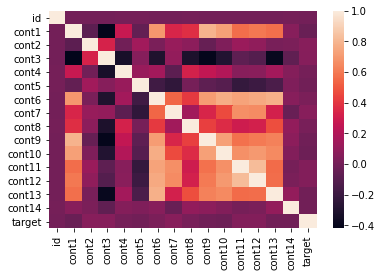

In [27]:
sns.heatmap(train.corr())

## MODELS

In [28]:
X = train.drop(['id', 'target'], axis=1)
y = train['target']

print(X.shape, y.shape)

(300000, 14) (300000,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

## Linear Regression

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_score = round(lr.score(X_train, y_train),3)
lr_mse = round(mean_squared_error(y_test,lr_pred),3)

In [38]:
print(lr_score, lr_mse)

0.019 0.523


<AxesSubplot:xlabel='target'>

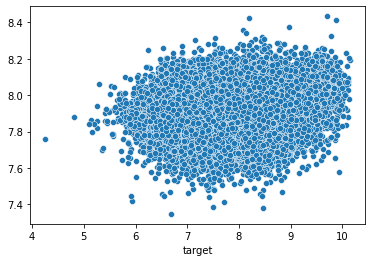

In [33]:
sns.scatterplot(y_test, lr_pred)

## Random Forest

In [42]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
ypred_rfr = rfr.predict(X_test)

In [44]:
rfr_rmse = round(mean_squared_log_error(y_test, ypred_rfr),3)
rfr_rmsle = round(np.sqrt(mean_squared_log_error(y_test, ypred_rfr)), 3)
print(
    'RFR RMSE:', rfr_rmse,
    'RFR RMSLE:', rfr_rmsle)

RFR RMSE: 0.006 RFR RMSLE: 0.08


In [45]:
# cross_validate(rfr, X_train, y_train,return_train_score=True)

## Gradient Boosting Regressor

In [41]:
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=5)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)
gbr_score = round(mean_squared_error(y_test, gbr_pred, squared=False), 3)
print(gbr_score)

0.70311
